In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy.stats import ttest_ind

In [72]:
df = pd.read_csv('shared_data_merged.csv')
df_dvd = pd.read_csv('DVD_original.csv')
df_va = pd.read_csv('VA_original.csv')

In [ ]:
df1 = pd.read_csv('')

In [105]:
# change education into a binary variable
college_ed = []
for val in df['education']:
    if pd.isnull(val):
        college_ed.append(np.nan)
    elif val >= 7:
        college_ed.append(1)
    else:
        college_ed.append(0)
df['college_ed'] = college_ed

In [116]:
# change the study type (VA or DVD) from a categorical to a binary variable
study_binary = []
for val in df['Study']:
    if pd.isnull(val):
        study_binary.append(np.nan)
    elif val == 'VA':
        study_binary.append(1)
    else:
        study_binary.append(0)
df['study_binary'] = study_binary

In [118]:
df_sub = df[['study_binary','Involve3', 'Opinion3', 'college_ed','Finaltx3', 'Explain3', 'age', 'gleason', 'psa1', 'white', 'TxgotTx3cc', 'irespmd', 'mdrespme', 'Txlean3', 'Mdtxrec3', 'Advice1', 'Talkda3', 'txgot_binary']]

In [119]:
cor = df_sub.corr()

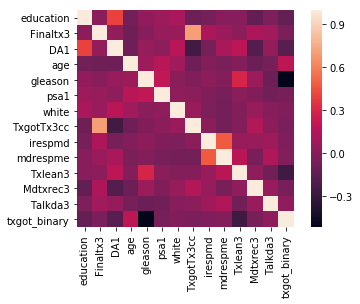

In [79]:
sns.heatmap(cor, square = True)

### Anxiety Changes

In [123]:
df_anx = df[['Anx11', 'Anx111', 'Anx112', 'Anx113', 'Anx12', 'Anx13', 'Anx51', 'Anx52', 'Anx53', 'Anx61', 'Anx62', 'Anx63', 'Anx71', 'Anx72', 'Anx73', 'Anx91', 'Anx92', 'Anx93', 'txgot']]

In [124]:
cor = df_anx.corr()

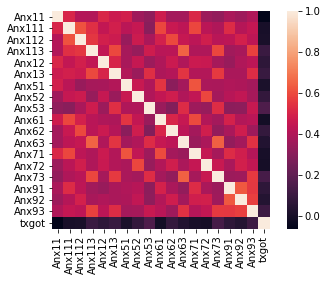

In [87]:
sns.heatmap(cor, square = True)

In [103]:
# the difference is statistically significant at alpha = 0.05, but not very interesting nevertheless
df_notna = df[(pd.isnull(df.Anx11) == False) & (pd.isnull(df.Anx12) == False)]
ttest_ind(df_notna['Anx11'], df_notna['Anx12'])

Ttest_indResult(statistic=-1.984001683029678, pvalue=0.047562479826339085)

In [99]:
print('Any reference to prostate cancer brought up strong feelings in me.')
print(np.nanmean(df['Anx11']), np.nanmean(df['Anx12']), np.nanmean(df['Anx13']), '\n')
print('Just hearing the words "prostate cancer" scared me.')
print(np.nanmean(df['Anx111']), np.nanmean(df['Anx112']), np.nanmean(df['Anx113']), '\n')
print('Other things kept making me think about prostate cancer.')
print(np.nanmean(df['Anx51']), np.nanmean(df['Anx52']), np.nanmean(df['Anx53']), '\n')
print('I felt kind of numb when I thought about prostate cancer.')
print(np.nanmean(df['Anx61']), np.nanmean(df['Anx62']), np.nanmean(df['Anx63']), '\n')
print('I thought about prostate cancer even though I didnt mean to.')
print(np.nanmean(df['Anx71']), np.nanmean(df['Anx72']), np.nanmean(df['Anx73']), '\n')
print('I had more trouble falling asleep because I couldnt get thoughts of prostate cancer out of my mind.')
print(np.nanmean(df['Anx91']), np.nanmean(df['Anx92']), np.nanmean(df['Anx93']), '\n')

Any reference to prostate cancer brought up strong feelings in me.
1.407488986784141 1.5420353982300885 1.520100502512563 

Just hearing the words "prostate cancer" scared me.
0.9515418502202643 1.0132743362831858 0.9195979899497487 

Other things kept making me think about prostate cancer.
0.9955947136563876 1.146341463414634 1.1381909547738693 

I felt kind of numb when I thought about prostate cancer.
0.8061674008810573 0.8869179600886918 0.9874371859296482 

I thought about prostate cancer even though I didnt mean to.
1.024229074889868 1.1172566371681416 1.2185929648241205 

I had more trouble falling asleep because I couldnt get thoughts of prostate cancer out of my mind.
0.48237885462555063 0.5110619469026548 0.6507537688442211 



# Visualizations

  categories  active_surv
0   (40, 50]     0.058824
1   (50, 60]     0.180180
2   (60, 70]     0.320574
3   (70, 80]     0.341463
4   (80, 90]     0.000000


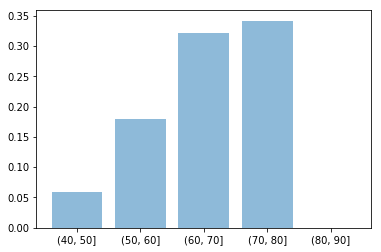

In [3]:
bins = [40,50,60,70,80,90] # creating 5 bins
df['categories'] = pd.cut(df['age'], bins)
counts = df.groupby('categories', as_index=False)['active_surv'].mean() # get the mean value from each bin
print(counts)
y_pos = np.arange(5)
plt.bar(y_pos, counts['active_surv'], align='center', alpha=0.5)
plt.xticks(y_pos, counts['categories'])
plt.show()

In [32]:
count = df.groupby(['pref_treatment']).size()
count

pref_treatment
1.0    102
2.0    156
3.0     53
4.0     23
5.0     46
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

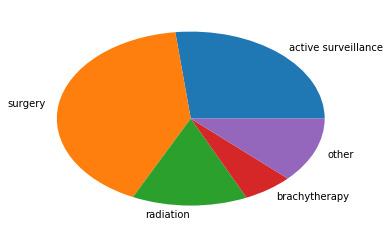

In [30]:
plt.pie(count, labels = ['active surveillance', 'surgery', 'radiation', 'brachytherapy', 'other'])
plt.show